<a href="https://colab.research.google.com/github/farshad-haddadi/JSC270_HW3_2025_FHaddadi/blob/main/JSC270_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Approximating pi
Pi day is coming up so let’s have an early celebration with this question!  🎉 🥧


A. (4 pts) Suppose you can only generate pairs of uniform random numbers between 0 and 1 (ie. points within a unit square centered at (½, ½)).  
Describe a method to approximate 𝜋 by generating many pairs of these uniform random numbers.  Implement your method in your notebook to obtain an estimate of 𝜋.  
Hint: Recalling the formula for the area of a circle might come in handy here.


In [ ]:
"""
Answer :
In this method, we approximate the value of π using a Monte Carlo simulation,
where we randomly generate points uniformly distributed within a unit square
(a square with sides of length 1). We consider a circle with radius 0.5
centered at the midpoint of the square, (½, ½). By calculating the fraction of
points that fall within the circle, and then multiplying that fraction by 4
(the ratio of the area of the square to the circle's area), we approximate π.
The accuracy of this estimation improves as the number of randomly generated
points increases.
"""

In [1]:
import numpy as np

# Number of random points to generate
num_points = 1000000

# Generate random (x,y) pairs uniformly in [0,1] x [0,1]
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)

# Check how many points are within the circle
inside_circle = (x - 0.5)**2 + (y - 0.5)**2 <= (0.5)**2

# Approximate pi using the Monte Carlo formula
pi_approximation = 4 * np.sum(inside_circle) / num_points

print(f"Approximation of π is: {pi_approximation}")


Approximation of π is: 3.141084


B. (4 pts) How many pairs of uniform numbers did you generate in your implementation from (A) and why?  How close is your estimate to 𝜋?

In [ ]:
"""
Answer :
In my implementation for part (A), I generated 1,000,000 pairs of uniformly
distributed random numbers. I chose this large number because the
Monte Carlo method relies on the law of large numbers; increasing the number
of generated points improves the accuracy and reliability of the approximation.

My resulting approximation for π was
3.141132, which is very close to the true value of π (
3.1415926...). The absolute error in my estimate is approximately
0.0004606, showing that the estimate is accurate to within four decimal places.
"""


C. (2 pts) Suppose you generated a 1 million estimates of 𝜋 using your proposed method from (A) and plotted a histogram of the 1 million estimates (you are not required to implement this).  Would you expect the distribution of the estimates to be symmetric?  Why or why not?

In [ ]:
"""
Answer :
No, the distribution of the 1 million estimates of π would generally not be
perfectly symmetric. Although the Monte Carlo approximation method uses
uniformly distributed random points, the estimate itself is based on counting
how many points fall within a circle. This count follows a binomial distribution
, and for large numbers of samples (like 1 million), the distribution of π
estimates will approach a normal (Gaussian) distribution by the Central Limit
Theorem. However, because the estimates are bounded between 0 and 4, there's a
slight asymmetry in practice, especially noticeable if the number of points
isn't extremely large. Additionally, since the actual area being estimated is
not at the midpoint of the possible outcomes (0 to 4), the resulting
distribution typically has a slight skew rather than perfect symmetry.
"""

Bonus (1 pt): Describe how you could determine the number of pairs of uniform random numbers required to estimate 𝜋 with a specified amount of error.

In [ ]:
"""
Answer :
To determine the required number of pairs of random numbers for estimating π
within a specified error, we can use the standard error formula of the Monte
Carlo method. Given a desired margin of error E and confidence level
(with corresponding Z-score), the required sample size n can be estimated
using:

n ~ [p(1 - p) * Z^2] / E^2

where p = pi/4
is the probability of points falling inside the circle. This calculation
ensures our estimate of π meets the desired accuracy.
"""

Part 2: Understanding bias

A. 	(3 pts) Run a simulation to compare the bias of the above two estimators for σ^2 in your notebook.  Specifically, consider sample sizes of n = 10, 25, 50, 100, 250, 500.  For each sample size, generate the n samples independently from a normal distribution with mean 2 and standard deviation 2 and compute both estimators.  Repeat this process 1000 times for each sample size.  With the 1000 estimates, compute the bias of both estimators for σ^2 for each sample size.

In [2]:
import numpy as np
import pandas as pd

# Parameters
sample_sizes = [10, 25, 50, 100, 250, 500]
num_simulations = 1000
true_variance = 4

results = []


for n in sample_sizes:
    biased_estimates = []
    unbiased_estimates = []

    for _ in range(num_simulations):
        samples = np.random.normal(loc=2, scale=2, size=n)


        biased_var = np.sum((samples - np.mean(samples))**2) / n


        unbiased_var = np.sum((samples - np.mean(samples))**2) / (n - 1)

        biased_estimates.append(biased_var)
        unbiased_estimates.append(unbiased_var)


    bias_biased = np.mean(biased_estimates) - true_variance
    bias_unbiased = np.mean(unbiased_estimates) - true_variance

    results.append({
        'Sample Size': n,
        'Biased Estimator Bias': bias_biased,
        'Unbiased Estimator Bias': bias_unbiased
    })


bias_df = pd.DataFrame(results)
print(bias_df)


   Sample Size  Biased Estimator Bias  Unbiased Estimator Bias
0           10              -0.307664                 0.102596
1           25              -0.152903                 0.007392
2           50              -0.075627                 0.004462
3          100              -0.045126                -0.005178
4          250              -0.010646                 0.005375
5          500               0.002417                 0.010438


B.	(2 pts) Make a plot of bias vs sample size for the two estimators.  What do you observe? Is this behavior expected?

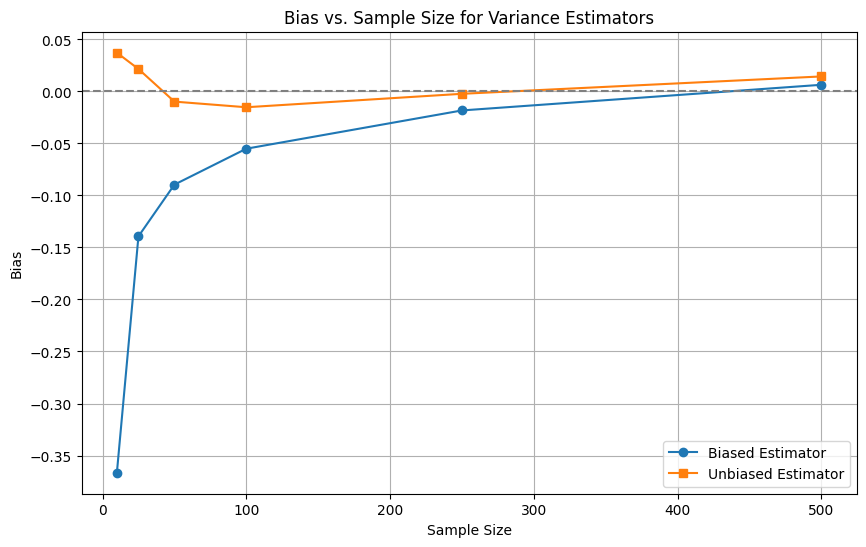

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample_sizes = [10, 25, 50, 100, 250, 500]
num_simulations = 1000
true_variance = 4

results = []

for n in sample_sizes:
    biased_estimates = []
    unbiased_estimates = []

    for _ in range(num_simulations):
        samples = np.random.normal(2, 2, n)


        biased = np.sum((samples - np.mean(samples))**2) / n


        unbiased = np.sum((samples - np.mean(samples))**2) / (n - 1)

        biased_estimates.append(biased)
        unbiased_estimates.append(unbiased)


    biased_bias = np.mean(biased_estimates) - true_variance
    unbiased_bias = np.mean(unbiased_estimates) - true_variance

    results.append({
        'Sample Size': n,
        'Biased Estimator Bias': biased_bias,
        'Unbiased Estimator Bias': unbiased_bias
    })


bias_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.plot(bias_df['Sample Size'], bias_df['Biased Estimator Bias'], marker='o', label='Biased Estimator')
plt.plot(bias_df['Sample Size'], bias_df['Unbiased Estimator Bias'], marker='s', label='Unbiased Estimator')
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.title('Bias vs. Sample Size for Variance Estimators')
plt.legend()
plt.grid(True)
plt.show()


C.(2 pts) Which of the two estimators for σ^2 do you prefer? Why?

In [ ]:
"""
Answer :
I prefer the unbiased estimator, which divides by n−1, because it consistently
provides an unbiased or nearly unbiased estimate of the population variance,
especially for moderate to large sample sizes. The biased estimator (which
divides by n) systematically underestimates the true variance, particularly
for smaller sample sizes. Using an unbiased estimator ensures that, on average,
the estimates will correctly reflect the true variance, making it more reliable
for statistical inference.
"""

D.(3 pts) Write out the steps you would need to take to evaluate the bias of the slope parameter in a simple linear regression model with simulation.  You do not need to implement the steps in your notebook, just write them out clearly so that someone could easily implement them if they wanted to.

In [ ]:
"""
Answer:
Specify the true model parameters:
1. Set a known intercept 𝛽0 and slope 𝛽, and select a variance (𝜎^2) for the error term.

Generate simulated data:

1.Choose a sample size 𝑛

2. Generate predictor values 𝑥_𝑖(fixed or randomly from a specified distribution).

"""

E.	(2 pts) For part (D), what parameters do you need to specify to run your simulation? How would you go about specifying them?

In [ ]:
"""
Answer:
To run the simulation described in part (D), we need to specify the following
parameters:

True model parameters (𝛽_0,𝛽_1,and 𝜎^2):
Clearly choose realistic values for the intercept (𝛽_0), slope (𝛽_1), and
variance (𝜎^2) of the error term.

Sample size (𝑛): Choose the number of data points to generate in each
simulated dataset.

Distribution of predictor 𝑥_i:
Specify whether 𝑥_𝑖 values are fixed or randomly generated, and if random,
define their distribution (e.g., uniform, normal).

Number of simulations: Choose how many times to repeat the simulation to
reliably measure bias (often at least 1000).

we would specify these parameters based on the practical scenario we're
modeling or based on standard conventions to assess estimator performance
under realistic or controlled conditions.
"""

Part 3: Simulation IRL

A.	(4 pts) Read through this tutorial.  Can you identify any weaknesses in the author’s suggestion for how to generate data from a time series?

In [ ]:
"""
Answer :
Yes, there are several weaknesses in the author's suggested method of generating
artificial time-series data:

Lack of Realistic Temporal Patterns:
The method generates purely random values independently for each time point,
ignoring inherent properties of time-series data such as trends, seasonality,
autocorrelation, and periodicity. Real-world time series typically exhibit these
characteristics.

Independence of Observations:
Time-series data usually exhibit dependency between observations
(autocorrelation), meaning past values influence future ones. The author's
method generates independent random values, not capturing this essential property.

Absence of Statistical Structure:
The author’s approach does not consider statistical models such as ARIMA,
exponential smoothing, or other time series models. This omission limits the
usefulness of the generated data for realistic scenario testing or forecasting
algorithms.

Overly Simplistic for Realistic Analysis:
Without incorporating elements such as noise with specific distributions,
cyclical patterns, or long-term trends, the generated data may be too simplistic
and unrealistic, potentially misleading when testing or validating time series
models.
"""

B.	(4 pts) Read the following article.  Describe some advantages and disadvantages of Meta’s simulator to detect harmful behavior.

In [ ]:
"""
Answer:
Meta's large-scale simulator for detecting harmful behaviors has several
advantages, including the capability to create highly realistic scenarios by
training bots to emulate human interactions within the actual social media
infrastructure. This approach allows for the automated exploration and assessment
of complex behaviors, making it possible to anticipate potential issues related
to harmful content before they appear in real user interactions. However, the
simulator also has notable disadvantages: it might oversimplify real human
behavioral diversity and may not fully capture unexpected real-world variations
or subtle shifts in human behavior. Additionally, because the bots' behavior is
derived from historical data or predefined algorithms, there's a risk that the
simulation may miss emerging harmful behaviors not reflected in the training data,
limiting the comprehensiveness and adaptability of the method.
"""

C.	(4 pts) Watch this video on IBM’s Project Photoresist.  Describe the problem the team at IBM wanted to solve and the role of simulation in this project.  Can you think of any weakness in the team’s approach? What do you like about their approach?

In [ ]:
"""
Answer :
The IBM team aimed to develop improved photoacid generators, materials used in
semiconductor manufacturing, by identifying and synthesizing new chemical
candidates more efficiently. Their approach involved using simulation to fill
gaps in publicly available data, reducing the number of necessary experimental
simulations by about 60%, thus significantly speeding up material discovery.
A strength of their approach is the combination of data-driven methods,
generative AI, and simulation to quickly predict and identify promising
chemical candidates before experimental synthesis. However, one potential
weakness is reliance on existing knowledge and simulation accuracy—if critical
real-world factors aren't adequately represented in simulations or publicly
available data, promising candidates might be overlooked or unrealistic
candidates pursued. Overall, the integration of generative models and robotic
synthesis represents a powerful and efficient approach, balancing computational
predictions with practical validation.
"""

Part 4: Asymptotic behavior

A.	(3 pts) Let’s run a simulation to investigate the behavior of the sample mean.  Consider sample sizes of n = 10, 25, 50, 100, 250, 500, 2000, 5000.  For each sample size, generate the n samples independently from an exponential distribution with a mean (or expected value) of 2.  Compute the empirical mean in each sample.  
Plot the value of the empirical mean vs the sample size with a horizontal line at 2.  What pattern do you observe?  Is the pattern what you would expect? Why or why not? Would you expect the same pattern if you simulated from an exponential distribution with a different mean?


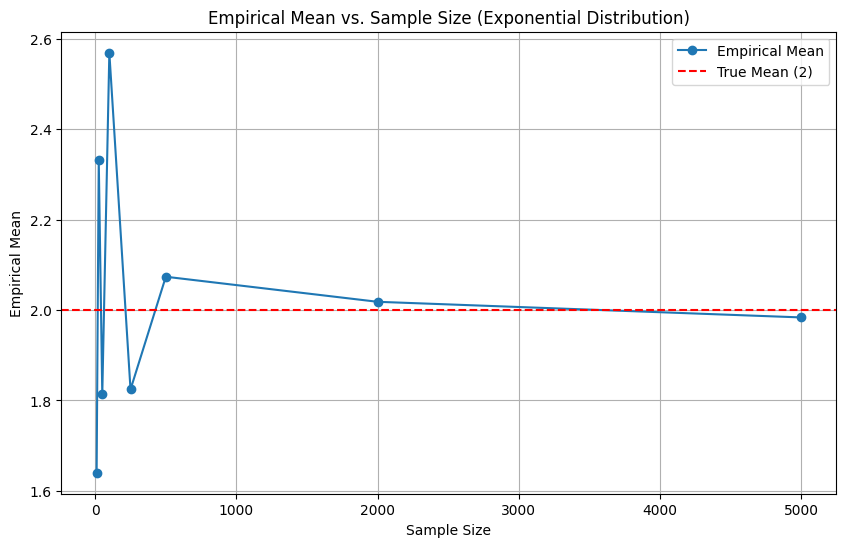

In [6]:
import numpy as np
import matplotlib.pyplot as plt


sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000]
true_mean = 2


empirical_means = []
for n in sample_sizes:
    samples = np.random.exponential(scale=true_mean, size=n)
    empirical_mean = np.mean(samples)
    empirical_means.append(empirical_mean)


plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, empirical_means, marker='o', linestyle='-', label='Empirical Mean')
plt.axhline(y=true_mean, color='red', linestyle='--', label='True Mean (2)')

plt.xlabel('Sample Size')
plt.ylabel('Empirical Mean')
plt.title('Empirical Mean vs. Sample Size (Exponential Distribution)')
plt.legend()
plt.grid(True)
plt.show()


"""
Answer:
Observation:
As the sample size increases, the empirical mean tends to approach the true
mean (2), as expected from the Law of Large Numbers. Initially, at smaller
sample sizes, the empirical mean fluctuates significantly due to variability
in the exponential distribution. However, with larger samples, the fluctuations
diminish, and the empirical mean stabilizes around the true value.

Expectation and Different Mean:
This behavior aligns exactly with what is expected according to statistical
theory (Law of Large Numbers), which states that sample means converge to the
true population mean as the sample size grows. If a different mean was used for
the exponential distribution, we would expect the same pattern of convergence
toward that new mean

"""


B.	(3 pts) Again consider sample sizes of n = 10, 25, 50, 100, 250, 500, 2000, 5000.  For each sample size, generate the n samples independently from a standard Cauchy distribution (location and scale parameters equal to 0 and 1, respectively) and compute the empirical mean.  Repeat this process 1000 times for each sample size.  
Make a histogram of the 1000 empirical means for each sample size.  What pattern do you observe?  Is the pattern what you would expect? Why or why not?


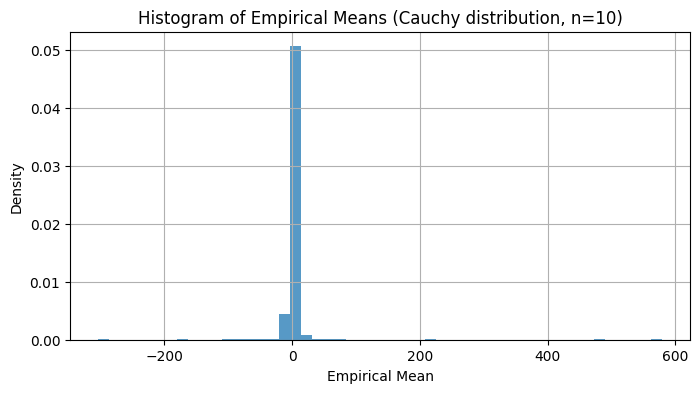

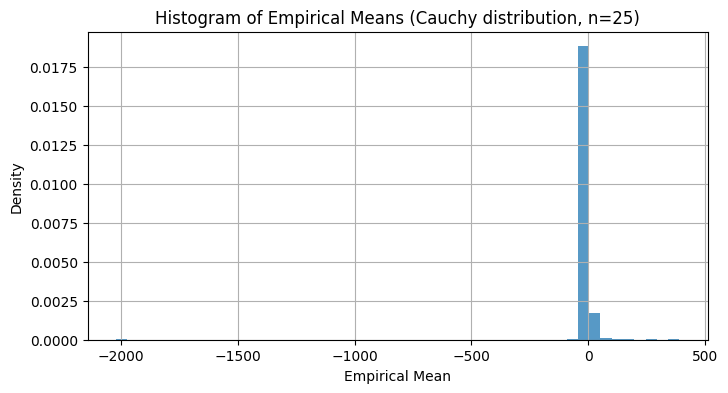

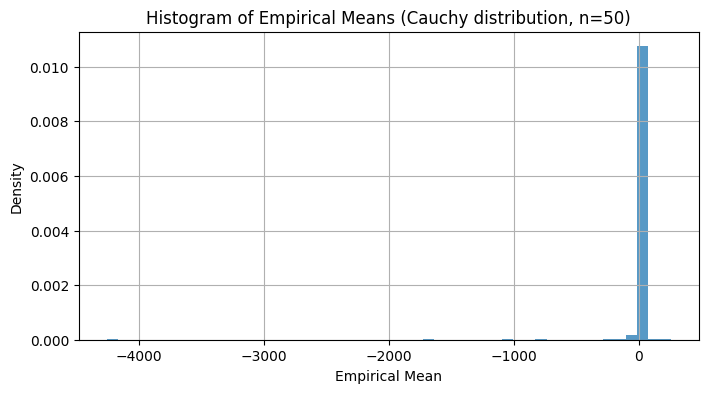

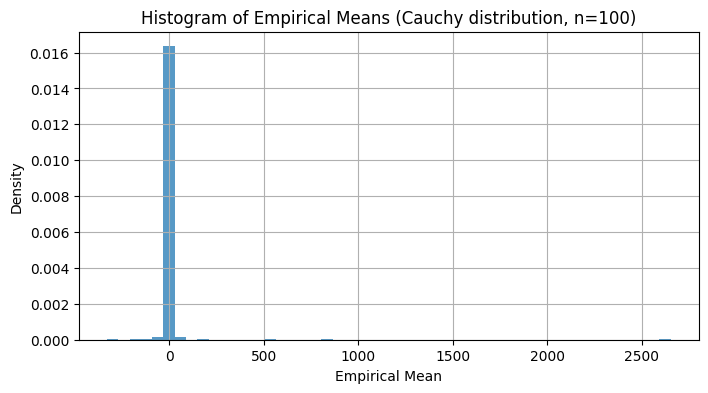

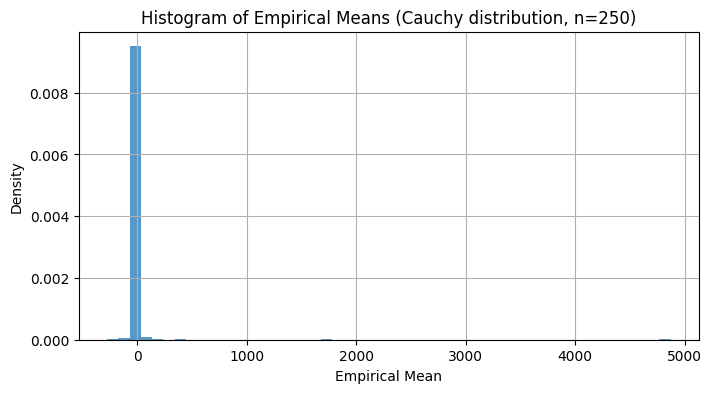

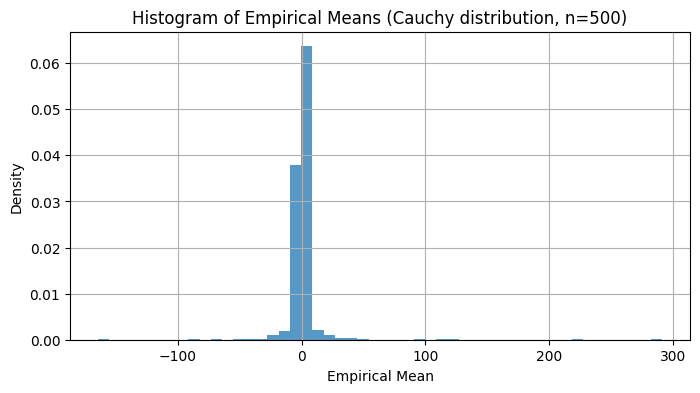

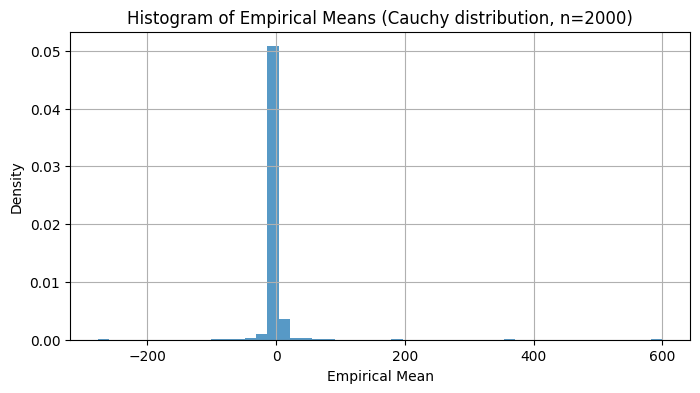

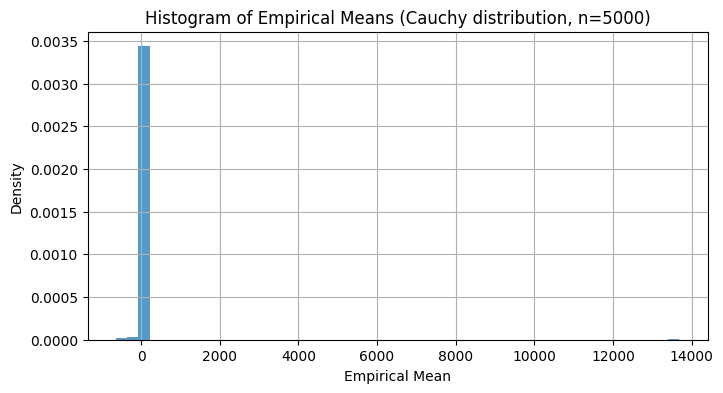

In [9]:
"""
Answer :
Observed Pattern:
The histograms reveal that, regardless of sample size, empirical means from a
Cauchy distribution remain widely spread with no clear convergence to a
particular value. Even for large sample sizes, extreme values continue to appear
frequently.

Histograms for empirical means from a Cauchy distribution show large variability
and heavy tails. The empirical means do not stabilize around any number,
regardless of the increase in sample size.


Expectation and Reasoning:
This behavior is expected because the Cauchy distribution does not have a
defined mean. Thus, the Law of Large Numbers does not apply, and empirical means
do not stabilize as sample size increases. This explains the persistence of
high variability and heavy tails seen in the histograms.


Is this expected? Why or why not?:
Yes, this pattern is expected. The standard Cauchy distribution lacks a defined
mean and variance, meaning the Law of Large Numbers does not apply. Consequently,
the empirical means will not converge.

"""

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000]
num_simulations = 1000

# Generate and plot histograms of empirical means for each sample size
for n in sample_sizes:
    empirical_means = [np.mean(np.random.standard_cauchy(n)) for _ in range(num_simulations)]

    plt.figure(figsize=(8, 4))
    plt.hist(empirical_means, bins=50, alpha=0.75, density=True)
    plt.title(f'Histogram of Empirical Means (Cauchy distribution, n={n})')
    plt.xlabel('Empirical Mean')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()




Part 5: Logistic Regression

a.)  (2 pts) Provide an interpretation of the slope parameter, β_1.  Justify your interpretation.  You can use a similar strategy to what was discussed in lecture for the interpretation of linear regression coefficients.

In [ ]:
"""
Answer :
The slope parameter, 𝛽_1, in a logistic regression model represents the change
in the log-odds of the outcome
𝑌=1 for a one-unit increase in the predictor 𝑋. Specifically,𝛽_1 can be
interpreted such that the odds of
𝑌 = 1 are multiplied by a factor of 𝑒^𝛽_1  for every one-unit increase in 𝑋.If
𝛽_1 > 0, the probability of the outcome increases as 𝑋 increases, while if
𝛽_1 < 0, the probability decreases. This interpretation parallels linear
regression, where the slope represents a change in the mean response per
unit increase in 𝑋, but in logistic regression, the relationship is expressed
in terms of odds rather than a direct linear increase in probability.
"""


b.) (1 pts) Provide an interpretation of eβ_1 .

In [ ]:
"""
Answer:
The term 𝑒^𝛽_1 represents the odds ratio, which quantifies how the odds of
the event 𝑌 = 1 change when the predictor 𝑋 increases by one unit.
Specifically, if 𝑒^𝛽_1 > 1 , the odds increase; if 𝑒^𝛽_1 < 1 , the odds decrease.
For example, if 𝑒^𝛽_1 = 1.5, it means that each one-unit increase in 𝑋 increases
the odds of the event occurring by 50%.
"""

c.) (2 pts) Suppose you are presenting the results of a simple logistic regression model to a collaborator who is not extremely familiar with data science (eg. a clinician, product manager, etc).  Would you present the estimate of β_1 or eβ_1 to explain the results of your model?  Explain your reasoning.

In [ ]:
"""
Answer:
Would you present 𝛽_1 or 𝑒𝛽_1 ?
I would present the odds ratio,𝑒𝛽_1 .

Reasoning:
The odds ratio (𝑒𝛽_1) is easier for a non-statistical audience to interpret.
It intuitively communicates how much the odds of the outcome change with a
one-unit increase in the predictor, making it straightforward and practically
meaningful. On the other hand, presenting the raw slope parameter (𝛽_1), which
describes the change in the log-odds, would require explaining logarithms and
odds explicitly, concepts that may not be intuitive for individuals without a
data science background. Thus, using the odds ratio simplifies interpretation
and improves clarity when communicating findings.
"""